In [17]:
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import binned_statistic_2d
import xarray as xr

In [18]:
### Load data
f_in = Path('/projects/wakedynamics/orybchuk/bcs-ldm/analyze/inflow_validation/sandia_scripts/1500/ensemble000/les_ed_shift/post_processing/MatlabProcessedSpinner.csv')
df = pd.read_csv(f_in)

n_rows = len(df)

In [19]:
### Add proper time axis to df
if '1500' in str(f_in):
    ref_time = pd.Timestamp('2023-07-24 15:00:25')
elif '1530' in str(f_in):
    ref_time = pd.Timestamp('2023-07-24 15:30:25')
elif '1600' in str(f_in):
    ref_time = pd.Timestamp('2023-07-24 16:00:25')
else:
    ref_time = pd.Timestamp('2000-01-01 00:00:00')
    
rel_time = (1e9*(df['trueScanTime'] - df['trueScanTime'].iloc[0])).astype('timedelta64[ns]')
df['time'] = ref_time + rel_time
df = df.set_index('time')

In [20]:
### Center coords on the turbine
df['yplot'] = df['yplot'] - df['yplot'].mean()
df['zplot'] = df['zplot'] - df['zplot'].mean()

In [21]:
df

,PitchAngs,RollAngs,YawAngs,txWTG,tyWTG,tzWTG,uExact,vExact,wExact,vmeas,xOut,yOut,zOut,xplot,yplot,zplot,trueScanTime
time,,,,,,,,,,,,,,,,,
2023-07-24 15:00:25.000000000,4.995111,-16.998530,-0.000856,356.144157,319.999954,120.336945,8.733287,0.003360,0.000000,7.817840,-109.337707,1.731773,-64.113074,241.838872,-16.824224,-65.830092,0.000000
2023-07-24 15:00:25.002032437,4.995804,-16.897557,-0.000764,356.144236,319.999960,120.336994,8.725620,0.003501,0.000000,7.808775,-109.343577,5.662543,-63.876132,241.750188,-12.885500,-66.770384,0.002032
2023-07-24 15:00:25.004064875,4.996436,-16.796598,-0.000678,356.144308,319.999966,120.337039,8.720172,0.003602,0.000000,7.802798,-109.362236,9.567404,-63.376888,241.672494,-8.892514,-67.438427,0.004065
2023-07-24 15:00:25.006097313,4.997008,-16.695653,-0.000597,356.144374,319.999971,120.337079,8.716970,0.003661,0.000000,7.800251,-109.393664,13.427760,-62.617927,241.606094,-4.865228,-67.831089,0.006097
2023-07-24 15:00:25.008129751,4.997523,-16.594722,-0.000522,356.144432,319.999976,120.337116,8.716027,0.003678,0.000000,7.802383,-109.437824,17.225257,-61.603198,241.551174,-0.823779,-67.946751,0.008130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24 15:12:05.991870248,6.683671,54984.436186,0.045706,358.049776,319.576345,120.429398,9.508001,1.224553,-0.150348,7.320475,-109.974508,-39.276425,49.313799,252.773797,52.643146,33.202569,700.991870
2023-07-24 15:12:05.993902686,6.683296,54984.597019,0.045779,358.049400,319.575950,120.429379,9.512093,1.159623,-0.187887,7.344204,-110.105438,-42.155333,46.568468,253.025960,50.084244,36.467803,700.993903
2023-07-24 15:12:05.995935124,6.682919,54984.757850,0.045852,358.049025,319.575555,120.429360,9.516484,1.095536,-0.222454,7.378161,-110.248014,-44.829975,43.641431,253.243311,47.307769,39.534831,700.995935


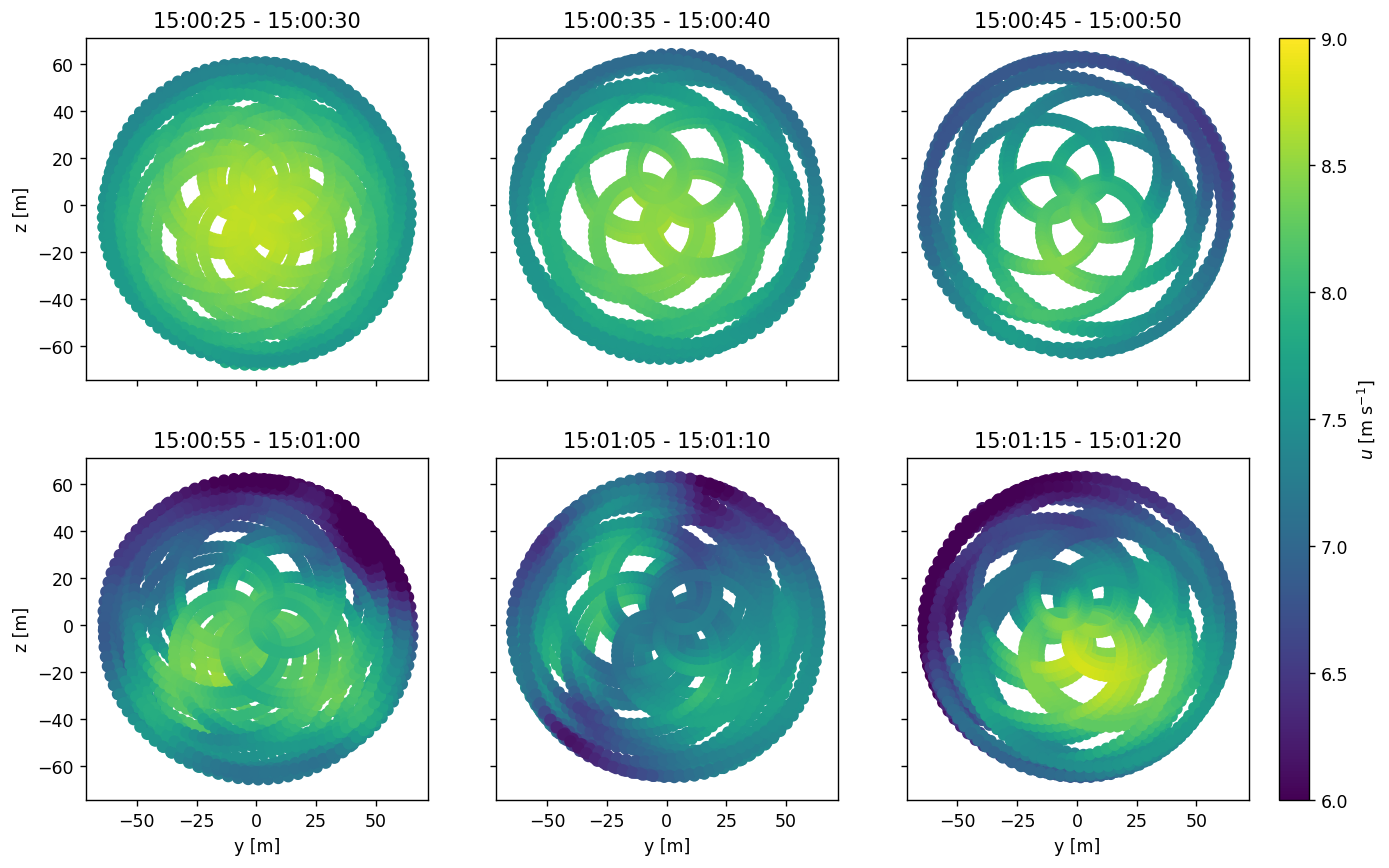

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(12,8), dpi=125, sharex=True, sharey=True)

## Decorate
for axs in ax[-1,:]:
    axs.set_xlabel('y [m]')
for axs in ax[:,0]:
    axs.set_ylabel('z [m]')

vmin, vmax = 6, 9

for axs in ax.flatten():
    axs.set_box_aspect(1)

## Data
start_time = ref_time
end_time = start_time + timedelta(seconds=5)
df_trim = df[(df.index > start_time) & (df.index < end_time)]

for i, axs in enumerate(ax.flatten()):
    axs.set_title(f'{start_time.strftime("%H:%M:%S")} - {end_time.strftime("%H:%M:%S")}')
    im0 = axs.scatter(df_trim['yplot'],
               df_trim['zplot'],
               c=df_trim['vmeas'],
               vmin=vmin,
               vmax=vmax,
               cmap='viridis')
    
    start_time = start_time + timedelta(seconds=10)
    end_time = end_time + timedelta(seconds=10)
    df_trim = df[(df.index > start_time) & (df.index < end_time)]

cax0 = fig.add_axes([ax[0,-1].get_position().x1+0.02,
                     ax[-1,-1].get_position().y0,
                     0.02,
                     ax[0,-1].get_position().y1-ax[-1,-1].get_position().y0])
cbar0 = fig.colorbar(im0, cax=cax0)
cbar0.set_label('$u$ [m s$^{-1}$]')
cbar0.ax.tick_params()


plt.show()

# Create a gridded version of spinner measurements

In [25]:
### Create a gridded version of spinner measurements
## Grid properties
dy_grid, dz_grid = 10, 10  # meters
dt_grid = 5  # sec
# dt_grid = 1  # sec
tgrid_start = pd.Timestamp(df.index[0]).ceil(freq='s')
tgrid_end = pd.Timestamp(df.index[-1]).floor(freq='s')
tgrid = pd.date_range(tgrid_start, tgrid_end, freq=f'{dt_grid}s')

## Initialize an Xarray Dataset
# ycoords = np.arange(round(df['yplot'].values.min())-1, round(df['yplot'].values.max())+1, dy_grid)
# zcoords = np.arange(round(df['zplot'].values.min())-1, round(df['zplot'].values.max())+1, dz_grid)
ycoords = np.arange(-80, 80+dy_grid, dy_grid)
zcoords = np.arange(-80, 80+dz_grid, dz_grid)

coords_grid = {'y': ycoords,
               'z': zcoords,
               'time': tgrid}

ds_grid = xr.Dataset(coords_grid)

## Populate Dataset
vlos_gridded = np.zeros((len(ycoords), len(zcoords), len(tgrid)))

# Binned statistic approach
#   See the following for helpful context
#   https://stackoverflow.com/questions/66673822/is-there-a-way-to-bin-a-set-of-2d-coordinates-in-python
#   https://stackoverflow.com/questions/68984073/how-to-put-a-grid-for-example-dividing-the-x-y-plane-into-bins-on-an-image-t
ycoords4binning = np.append(ycoords, ycoords[-1]+dy_grid)
zcoords4binning = np.append(zcoords, zcoords[-1]+dz_grid)
for tstep in range(len(tgrid)-1):
    # Trim to sub-period
    start_time, end_time = tgrid[tstep], tgrid[tstep+1]
    df_trim = df[(df.index < end_time) & (df.index > start_time)]    
    # Bin
    ycoord_data = df_trim['yplot'].values
    zcoord_data = df_trim['zplot'].values
    vlos_data = df_trim['vmeas'].values
    binned_results = binned_statistic_2d(x=ycoord_data,
                                         y=zcoord_data,
                                         values=vlos_data,
                                         statistic='mean',
                                         bins=(ycoords4binning, zcoords4binning))
    
    vlos_gridded[:,:,tstep] = binned_results.statistic.copy()
    
ds_grid['vlos'] = (('y', 'z', 'time'), vlos_gridded)

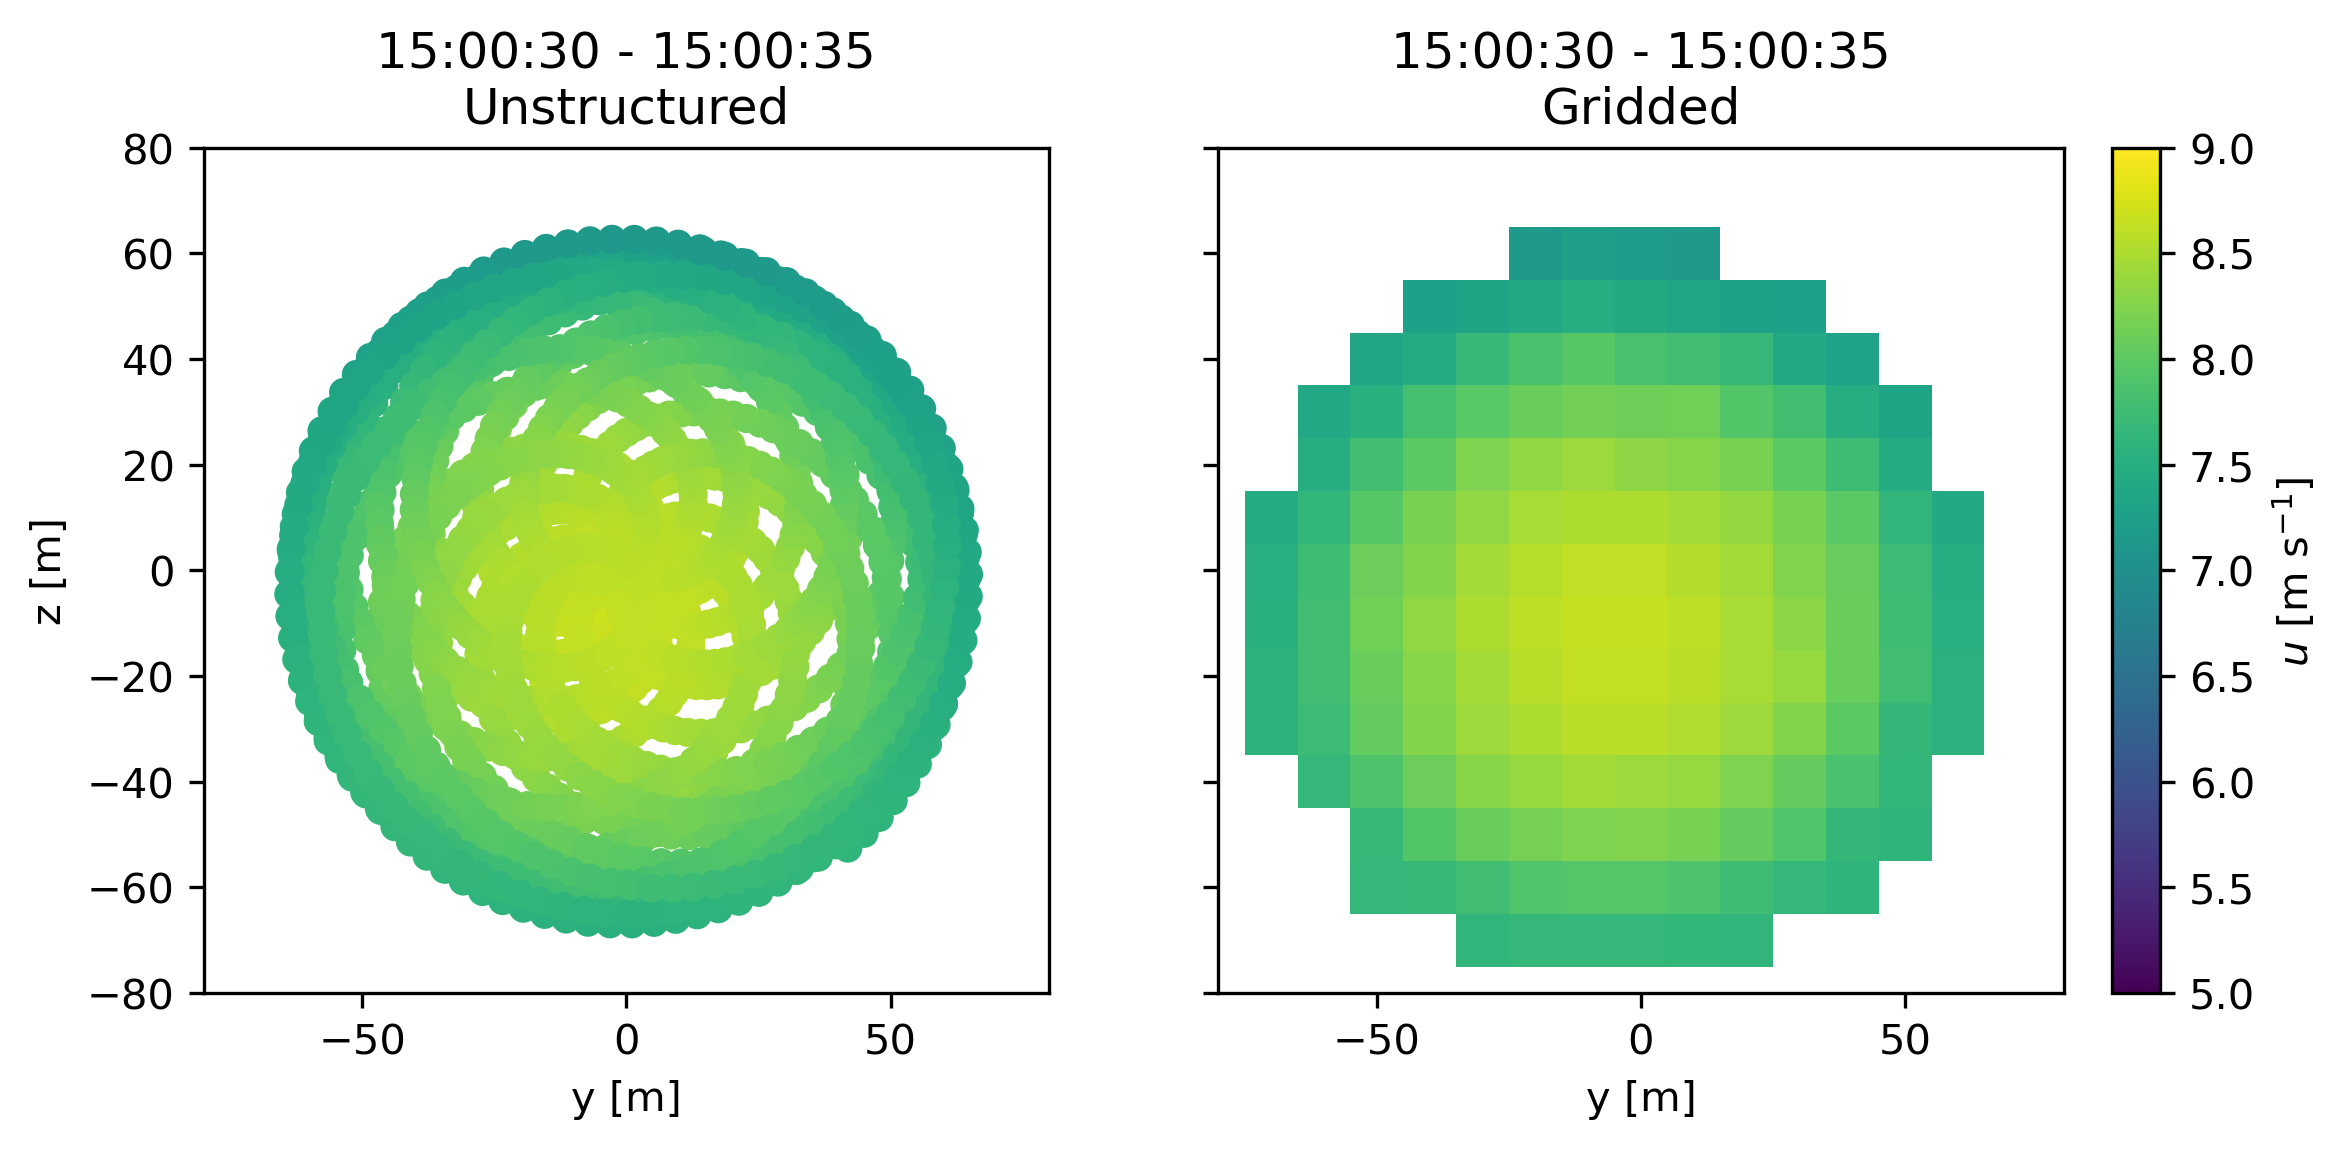

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), dpi=300, sharex=True, sharey=True)

## Decorate
ax[0].set_xlim(ds_grid['y'].min(), ds_grid['y'].max())
ax[0].set_ylim(ds_grid['z'].min(), ds_grid['z'].max())

for axs in ax:
    axs.set_xlabel('y [m]')
ax[0].set_ylabel('z [m]')

vmin, vmax = 5, 9

for axs in ax:
    axs.set_box_aspect(1)

# Data
start_time, end_time = tgrid[1], tgrid[2]
df_raw_plt = df_trim = df[(df.index < end_time) & (df.index > start_time)]    

ax[0].set_title(f'{start_time.strftime("%H:%M:%S")} - {end_time.strftime("%H:%M:%S")}\nUnstructured')
im0 = ax[0].scatter(df_raw_plt['yplot'],
           df_raw_plt['zplot'],
           c=df_raw_plt['vmeas'],
           vmin=vmin,
           vmax=vmax,
           cmap='viridis')


ax[1].set_title(f'{start_time.strftime("%H:%M:%S")} - {end_time.strftime("%H:%M:%S")}\nGridded')
# im1 = ax[1].imshow(ds_grid['u'].sel(time=start_time).values.T,
#                    origin='lower',
#                    vmin=vmin,
#                    vmax=vmax)
im1 = ax[1].pcolormesh(ds_grid['y'],
                       ds_grid['z'],
                       ds_grid['vlos'].sel(time=start_time).values.T,
                       vmin=vmin,
                       vmax=vmax)


cax0 = fig.add_axes([ax[-1].get_position().x1+0.02,
                     ax[-1].get_position().y0,
                     0.02,
                     ax[-1].get_position().y1-ax[-1].get_position().y0])
cbar0 = fig.colorbar(im0, cax=cax0)
cbar0.set_label('$u$ [m s$^{-1}$]')
cbar0.ax.tick_params()

# plt.savefig('figs/spinner_lidar_gridded_demo.png', bbox_inches='tight')

plt.show()

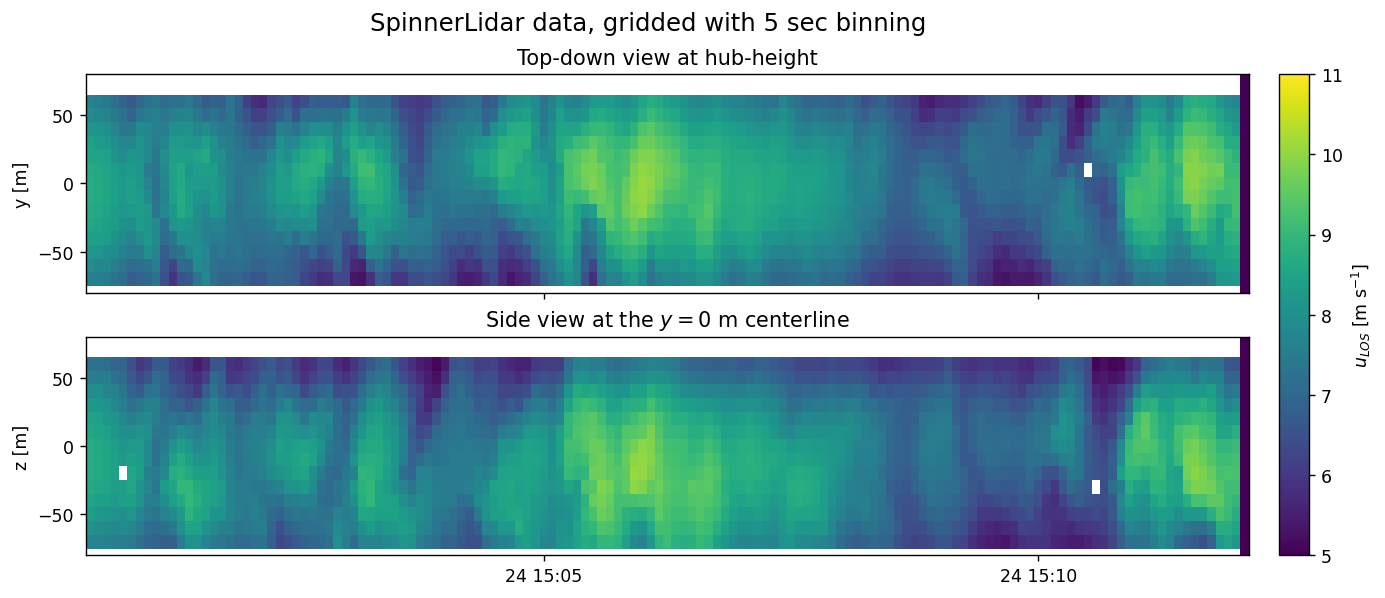

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12,5), sharex=True, dpi=125)

## Decorate
ax[0].set_ylabel('y [m]')
ax[1].set_ylabel('z [m]')
ax[0].set_ylim(ds_grid['y'].min(), ds_grid['y'].max())
ax[1].set_ylim(ds_grid['z'].min(), ds_grid['z'].max())
ax[0].set_title('Top-down view at hub-height')
ax[1].set_title('Side view at the $y=0$ m centerline')
plt.suptitle(f"SpinnerLidar data, gridded with {dt_grid} sec binning", fontsize=14)

vmin, vmax = 5, 11

im0 = ax[0].pcolormesh(ds_grid['time'],
                       ds_grid['y'],
                       ds_grid['vlos'].isel(z=7).values,
                       vmin=vmin,
                       vmax=vmax)

im1 = ax[1].pcolormesh(ds_grid['time'],
                       ds_grid['z'],
                       ds_grid['vlos'].isel(y=7).values,
                       vmin=vmin,
                       vmax=vmax)

cax0 = fig.add_axes([ax[-1].get_position().x1+0.02,
                     ax[-1].get_position().y0,
                     0.02,
                     ax[0].get_position().y1-ax[-1].get_position().y0])
cbar0 = fig.colorbar(im0, cax=cax0)
cbar0.set_label('$u_{LOS}$ [m s$^{-1}$]')
cbar0.ax.tick_params()


plt.show()

# Batch process data

In [14]:
### Grid many files
## Specify the files
all_files = []
f_parent_batch = Path('/projects/wakedynamics/orybchuk/bcs-ldm/analyze/inflow_validation/sandia_scripts/1530_2')
for i in range(30):
    all_files.append(Path(f_parent_batch, f'ensemble{str(i).zfill(3)}/les_ed_shift/post_processing/MatlabProcessedSpinner.csv'))
    
## Iterate over files
all_ds = []
for f_in in all_files:
    df = pd.read_csv(f_in)
    n_rows = len(df)
    
    # Add proper time axis to df
    if '1500' in str(f_parent_batch) or '072415_1' in str(f_parent_batch):
        ref_time = pd.Timestamp('2023-07-24 15:00:25')
    elif '1530' in str(f_parent_batch) or '072415_2' in str(f_parent_batch):
        ref_time = pd.Timestamp('2023-07-24 15:30:25')
    elif '1600' in str(f_parent_batch) or '072415_3' in str(f_parent_batch):
        ref_time = pd.Timestamp('2023-07-24 16:00:25')
    else:
        ref_time = pd.Timestamp('2000-01-01 00:00:00')
    rel_time = (1e9*(df['trueScanTime'] - df['trueScanTime'].iloc[0])).astype('timedelta64[ns]')
    df['time'] = ref_time + rel_time
    df = df.set_index('time')
    
    # Center coords on the turbine
    df['yplot'] = df['yplot'] - df['yplot'].mean()
    df['zplot'] = df['zplot'] - df['zplot'].mean()
    
    ## Create a gridded version of spinner measurements
    # Grid properties
    dy_grid, dz_grid = 10, 10  # meters
    dt_grid = 5  # sec
    tgrid_start = pd.Timestamp(df.index[0]).ceil(freq='s')
    tgrid_end = pd.Timestamp(df.index[-1]).floor(freq='s')
    tgrid = pd.date_range(tgrid_start, tgrid_end, freq=f'{dt_grid}s')

    # Initialize an Xarray Dataset
    ycoords = np.arange(-80, 80+dy_grid, dy_grid)
    zcoords = np.arange(-80, 80+dz_grid, dz_grid)

    coords_grid = {'y': ycoords,
                   'z': zcoords,
                   'time': tgrid}

    ds_grid = xr.Dataset(coords_grid)

    ## Populate Dataset
    vlos_gridded = np.zeros((len(ycoords), len(zcoords), len(tgrid)))

    # Binned statistic approach
    #   See the following for helpful context
    #   https://stackoverflow.com/questions/66673822/is-there-a-way-to-bin-a-set-of-2d-coordinates-in-python
    #   https://stackoverflow.com/questions/68984073/how-to-put-a-grid-for-example-dividing-the-x-y-plane-into-bins-on-an-image-t
    ycoords4binning = np.append(ycoords, ycoords[-1]+dy_grid)
    zcoords4binning = np.append(zcoords, zcoords[-1]+dz_grid)
    for tstep in range(len(tgrid)-1):
        # Trim to sub-period
        start_time, end_time = tgrid[tstep], tgrid[tstep+1]
        df_trim = df[(df.index < end_time) & (df.index > start_time)]    
        # Bin
        ycoord_data = df_trim['yplot'].values
        zcoord_data = df_trim['zplot'].values
        vlos_data = df_trim['vmeas'].values
        binned_results = binned_statistic_2d(x=ycoord_data,
                                             y=zcoord_data,
                                             values=vlos_data,
                                             statistic='mean',
                                             bins=(ycoords4binning, zcoords4binning))

        vlos_gridded[:,:,tstep] = binned_results.statistic.copy()

    ds_grid['vlos'] = (('y', 'z', 'time'), vlos_gridded)
    ds_grid.to_netcdf(Path(f_in.parent, 'gridded_vlos.nc'))
    
    all_ds.append(ds_grid.copy())

In [15]:
### Concatenate all ensemble members
ds_concat = xr.concat(all_ds, dim='ens')
ds_concat.to_netcdf(Path(f_parent_batch, 'spinner_recon_ensemble.nc'))

In [16]:
ds_concat

<xarray.Dataset>
Dimensions:  (y: 17, z: 17, time: 141, ens: 30)
Coordinates:
  * y        (y) int64 -80 -70 -60 -50 -40 -30 -20 -10 0 10 20 30 40 50 60 70 80
  * z        (z) int64 -80 -70 -60 -50 -40 -30 -20 -10 0 10 20 30 40 50 60 70 80
  * time     (time) datetime64[ns] 2023-07-24T15:30:25 ... 2023-07-24T15:42:05
Dimensions without coordinates: ens
Data variables:
    vlos     (ens, y, z, time) float64 nan nan nan nan nan ... nan nan nan 0.0